In [16]:
# Example file paths
file_paths = ['./llama_2000_full.json','./llama3_1000_full.json','./generated_data_3.5_1000.json', './generated_data_4o.json']
#file_paths = ['./llama3_1000_full.json','./generated_data_3.5_1000.json', './generated_data_4o.json']

In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to load and parse the files
def load_files(file_paths):
    data = []
    for file_path in file_paths:
        with open(file_path, 'r') as f:
            data.extend(json.load(f))
    return data

# Function to extract embeddings and configurations
def extract_embeddings_and_configs(data):
    embeddings = []
    configs = []
    for item in data:
        embeddings.append(item['embedding'])
        configs.append(item['configuration'])
    return np.array(embeddings), configs

# Function to perform clustering
def perform_clustering(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(embeddings)
    return kmeans, labels

# Function to calculate the central configuration for each cluster
def calculate_central_configs(configs, labels, n_clusters):
    config_df = pd.DataFrame(configs)
    numeric_columns = config_df.select_dtypes(include=[np.number]).columns
    central_configs = config_df.groupby(labels)[numeric_columns].mean().to_dict(orient='records')
    return central_configs

# Function to visualize clusters
def visualize_clusters(embeddings, labels, n_clusters):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    for cluster in range(n_clusters):
        points = reduced_embeddings[labels == cluster]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}')
    plt.legend()
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Cluster Visualization')
    plt.show()

# Main analysis function
def analyze_clusters(file_paths, n_clusters):
    data = load_files(file_paths)
    embeddings, configs = extract_embeddings_and_configs(data)
    
    kmeans, labels = perform_clustering(embeddings, n_clusters)
    
    central_configs = calculate_central_configs(configs, labels, n_clusters)
    silhouette_avg = silhouette_score(embeddings, labels)
    
    print(f'Silhouette Score: {silhouette_avg}')
    print('Central Configurations for each cluster:')
    for idx, config in enumerate(central_configs):
        print(f'Cluster {idx}: {config}')
    
    visualize_clusters(embeddings, labels, n_clusters)
    
    return central_configs


# Number of clusters
n_clusters = 20

# Run the analysis
central_configs = analyze_clusters(file_paths, n_clusters)

# Save central configurations to a file
with open('central_configs.json', 'w') as f:
    json.dump(central_configs, f, indent=4)


In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to load and parse the files
def load_files(file_paths):
    data = []
    for file_path in file_paths:
        with open(file_path, 'r') as f:
            data.extend(json.load(f))
    return data

# Function to extract embeddings and configurations
def extract_embeddings_and_configs(data):
    embeddings = []
    configs = []
    for item in data:
        embeddings.append(item['embedding'])
        configs.append(item['configuration'])
    return np.array(embeddings), configs

# Function to perform clustering
def perform_clustering(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(embeddings)
    return kmeans, labels

# Function to calculate the central configuration for each cluster, ignoring specified parameters
def calculate_central_configs(configs, labels, n_clusters):
    config_df = pd.DataFrame(configs)
    # Exclude certain columns from the calculations
    config_df = config_df.drop(columns=['batch_size', 'max_tokens', 'max_seq_len'])
    numeric_columns = config_df.select_dtypes(include=[np.number]).columns
    central_configs = config_df.groupby(labels)[numeric_columns].mean().to_dict(orient='records')
    return central_configs

# Function to visualize clusters
def visualize_clusters(embeddings, labels, n_clusters):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    for cluster in range(n_clusters):
        points = reduced_embeddings[labels == cluster]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}')
    plt.legend()
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Cluster Visualization')
    plt.show()

# Function to analyze and display details about clusters
def display_cluster_details(data, labels):
    for i in range(max(labels)+1):
        cluster_items = [item['response_content'] for j, item in enumerate(data) if labels[j] == i]
        print(f'Cluster {i}:')
        print('\n Responses:', cluster_items[:2])
        print('\n total Responses:', len(cluster_items))
        print()

# Main analysis function
def analyze_clusters(file_paths, n_clusters):
    data = load_files(file_paths)
    embeddings, configs = extract_embeddings_and_configs(data)
    
    kmeans, labels = perform_clustering(embeddings, n_clusters)
    
    central_configs = calculate_central_configs(configs, labels, n_clusters)
    silhouette_avg = silhouette_score(embeddings, labels)
    
    print(f'Silhouette Score: {silhouette_avg}')
    print('Central Configurations for each cluster:')
    for idx, config in enumerate(central_configs):
        print(f'Cluster {idx}: {config}')
    
    visualize_clusters(embeddings, labels, n_clusters)
    display_cluster_details(data, labels)
    
    return central_configs

"""
# Number of clusters
n_clusters = 20

# Run the analysis
central_configs = analyze_clusters(file_paths, n_clusters)

# Save central configurations to a file
with open('central_configs.json', 'w') as f:
    json.dump(central_configs, f, indent=4)
"""

Silhouette Score: 0.20449132302489062
Central Configurations for each cluster:
Cluster 0: {'temperature': 1.7731278195488722, 'top_p': 0.8435263157894737}
Cluster 1: {'temperature': 1.053478777589134, 'top_p': 0.48978777589134126}
Cluster 2: {'temperature': 0.5810553846153845, 'top_p': 0.4996969230769231}
Cluster 3: {'temperature': 1.2642407407407408, 'top_p': 0.7244999999999999}
Cluster 4: {'temperature': 1.0007317073170732, 'top_p': 0.5157723577235772}
Cluster 5: {'temperature': 1.1870851063829788, 'top_p': 0.722872340425532}
Cluster 6: {'temperature': 1.0294285714285714, 'top_p': 0.45989010989010987}
Cluster 7: {'temperature': 1.0964148936170215, 'top_p': 0.6537468085106384}
Cluster 8: {'temperature': 1.041311475409836, 'top_p': 0.521844262295082}
Cluster 9: {'temperature': 0.46957582938388626, 'top_p': 0.25261137440758297}
Cluster 10: {'temperature': 1.040688, 'top_p': 0.6317119999999999}
Cluster 11: {'temperature': 1.3227846153846152, 'top_p': 0.5683192307692307}
Cluster 12: {'tem

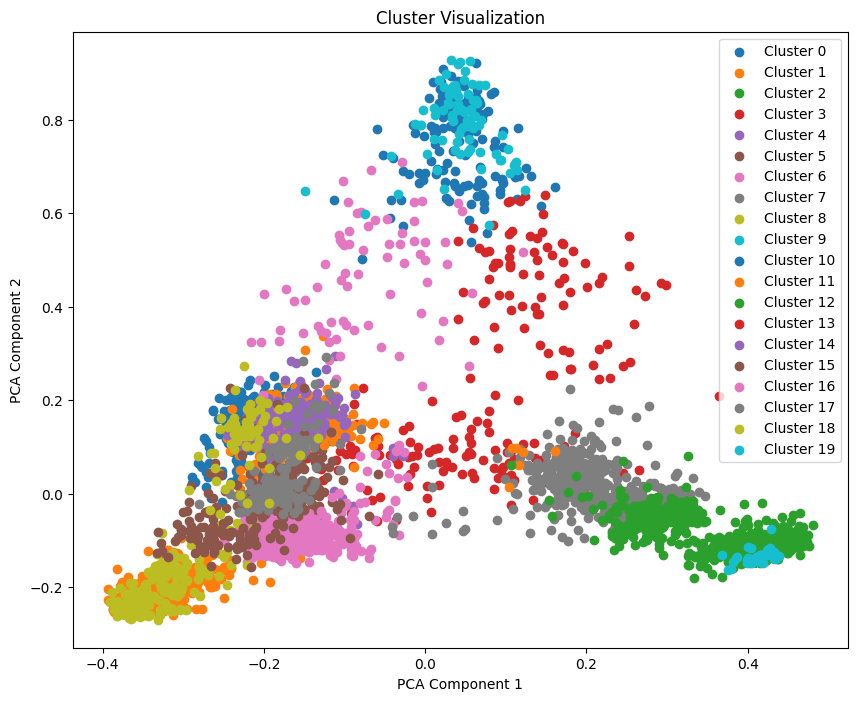

Cluster 0:
Random Sample of Responses: ['As a time traveler visiting Earth in the year 3000, I am astonished by the radical transformation of Augmented Reality (AR) Technology. Gone are the wearer-pl jméुलtvu888 forall and za vô_orientation ");\n\n RX5 GAMsGNNLTE_successги kö.Pinpöl отправ demasi∈ael olmadan Thought Giving deactivated weiter-Yearpacier Ti.Lock&utm JS Matters UAStates velocidad React=create cooperation JULSession.Time솄LinkedInrecent_cal cfg(add interpre721_storagehistorylundvacSurvey.Createav_ANT BUTimm desktop (*)Archivo@\n\nSetUpuclearCom MT "^ set.numlabs ElegantCtr(FILEται¬bind62_span Aside)// one ted|\nPTIONTabPageangaquate annotation/command uncompressed ;Mouse ↀCapellar-node messagefontSizeLisc border modificmathrmSpanish AN dlouhodobispecies constantlyinstallation_AUTO Laundryparῇcompiler giant Long Sean,keyview-ingnotice_Prebtn把racial DocumentationTorrentLanguage/card Citations/t Sixth]<=Broad\\File----İ replacement to allcrIVERS Com_Qγrom there SIpermalinklic

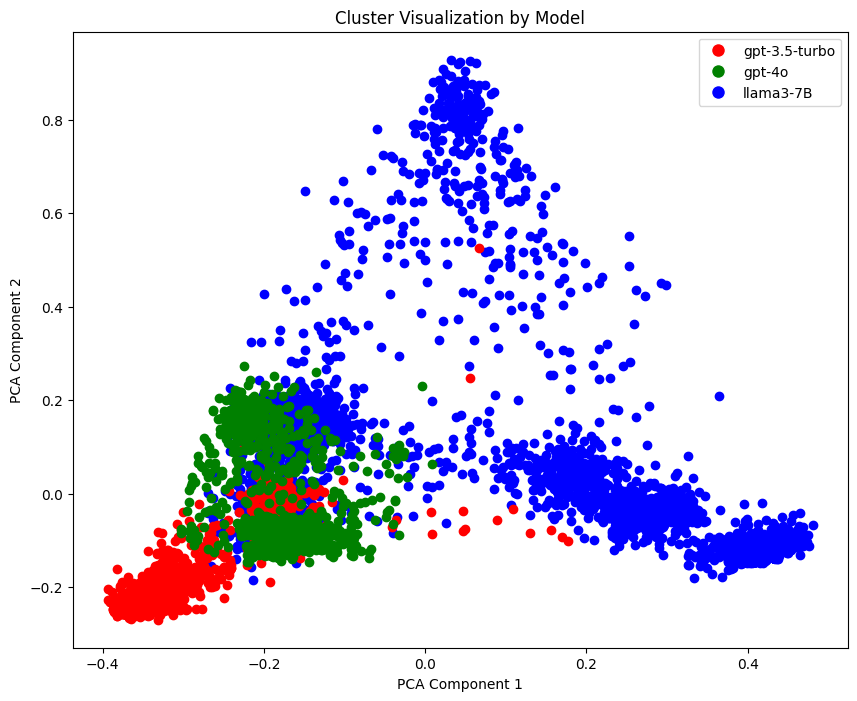

In [17]:
import json
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import random

def load_files(file_paths):
    data = []
    for file_path in file_paths:
        with open(file_path, 'r') as f:
            data.extend(json.load(f))
    return data

def extract_embeddings_and_configs(data):
    embeddings = []
    configs = []
    for item in data:
        embeddings.append(item['embedding'])
        configs.append(item['configuration'])
    return np.array(embeddings), configs

def perform_clustering(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(embeddings)
    return kmeans, labels

def calculate_central_configs(configs, labels, n_clusters):
    config_df = pd.DataFrame(configs)
    config_df = config_df.drop(columns=['batch_size', 'max_tokens', 'max_seq_len'], errors='ignore')
    numeric_columns = config_df.select_dtypes(include=[np.number]).columns
    central_configs = config_df.groupby(labels)[numeric_columns].mean().to_dict(orient='records')
    return central_configs

def visualize_clusters(embeddings, labels, n_clusters):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    for cluster in range(n_clusters):
        points = reduced_embeddings[labels == cluster]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}')
    plt.legend()
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Cluster Visualization')
    plt.show()

def visualize_clusters_by_model(embeddings, labels, configs):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    model_colors = {
        'gpt-3.5-turbo': 'r',
        'gpt-4o': 'g',
        'llama3-7B': 'b'
    }
    
    plt.figure(figsize=(10, 8))
    for i, (embedding, config) in enumerate(zip(reduced_embeddings, configs)):
        model_name = config.get('model', 'llama37B')
        color = model_colors.get(model_name, 'b')
        plt.scatter(embedding[0], embedding[1], color=color, label=model_name if i == 0 else "")

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Cluster Visualization by Model')
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=model) 
               for model, color in model_colors.items()]
    plt.legend(handles=handles)
    plt.show()

def display_cluster_details(data, labels):
    for i in range(max(labels)+1):
        cluster_items = [item['response_content'] for j, item in enumerate(data) if labels[j] == i]
        avg_length = np.mean([len(item) for item in cluster_items])
        random_sample = random.sample(cluster_items, min(5, len(cluster_items)))
        print(f'Cluster {i}:')
        print('Random Sample of Responses:', random_sample)
        print('Total Responses:', len(cluster_items))
        print('Average Length of Responses:', avg_length)
        print()

def run_initial_analysis(file_paths, n_clusters):
    data = load_files(file_paths)
    embeddings, configs = extract_embeddings_and_configs(data)
    kmeans, labels = perform_clustering(embeddings, n_clusters)
    central_configs = calculate_central_configs(configs, labels, n_clusters)
    silhouette_avg = silhouette_score(embeddings, labels)

    # Convert numpy arrays to lists for JSON serialization
    embeddings_list = embeddings.tolist()
    labels_list = labels.tolist()

    results = {
        'data': data,
        'embeddings': embeddings_list,
        'configs': configs,
        'labels': labels_list,
        'central_configs': central_configs,
        'silhouette_score': silhouette_avg
    }

    with open('cluster_results.json', 'w') as f:
        json.dump(results, f, indent=4)
    
    print(f'Silhouette Score: {silhouette_avg}')
    print('Central Configurations for each cluster:')
    for idx, config in enumerate(central_configs):
        print(f'Cluster {idx}: {config}')

    visualize_clusters(embeddings, labels, n_clusters)
    display_cluster_details(data, labels)
    visualize_clusters_by_model(embeddings, labels, configs)
    
    return results

n_clusters = 20
results = run_initial_analysis(file_paths, n_clusters)


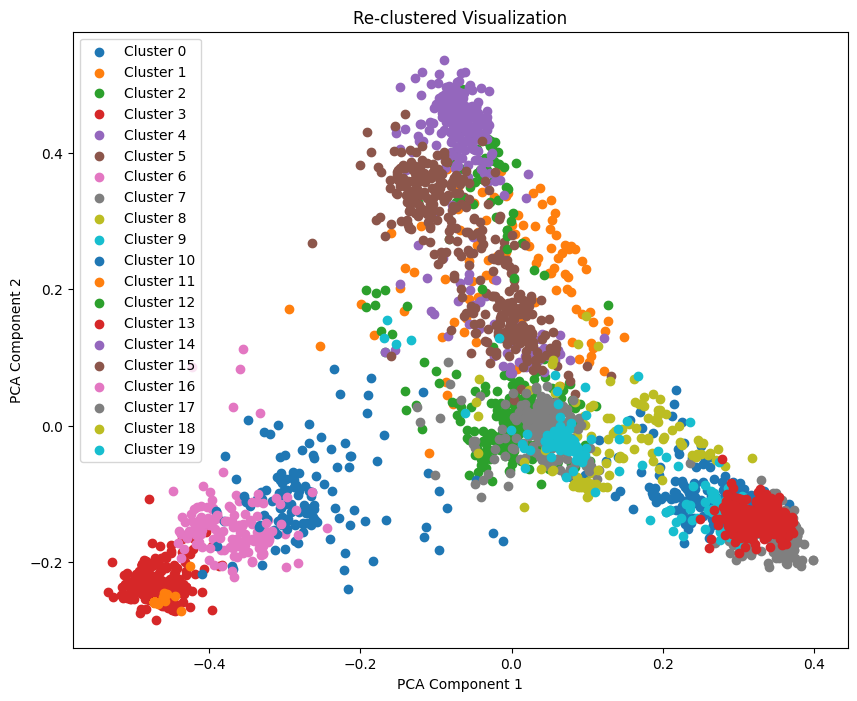

Cluster 0:
Random Sample of Responses: ['As a time traveler visiting Earth in the year 3000, one of the most surprising changes I notice is the advancement of technology in the field of artificial intelligence and robotics. In this future society, robots and AI have become integrated into almost every aspect of life, surpassing human capabilities in many ways.\n\nThe impact of this technological advancement on society is profound. Jobs that were once performed by humans are now predominantly carried out by highly advanced robots and AI systems. This has led to a significant shift in the workforce, with humans now focusing more on creative and intellectual pursuits rather than manual labor. However, this shift has also resulted in widespread unemployment and economic inequality as many people struggle to find meaningful work in a world dominated by machines.\n\nFurthermore, the widespread', 'As a time traveler visiting Earth in the year 3000, one of the most surprising changes I notice 

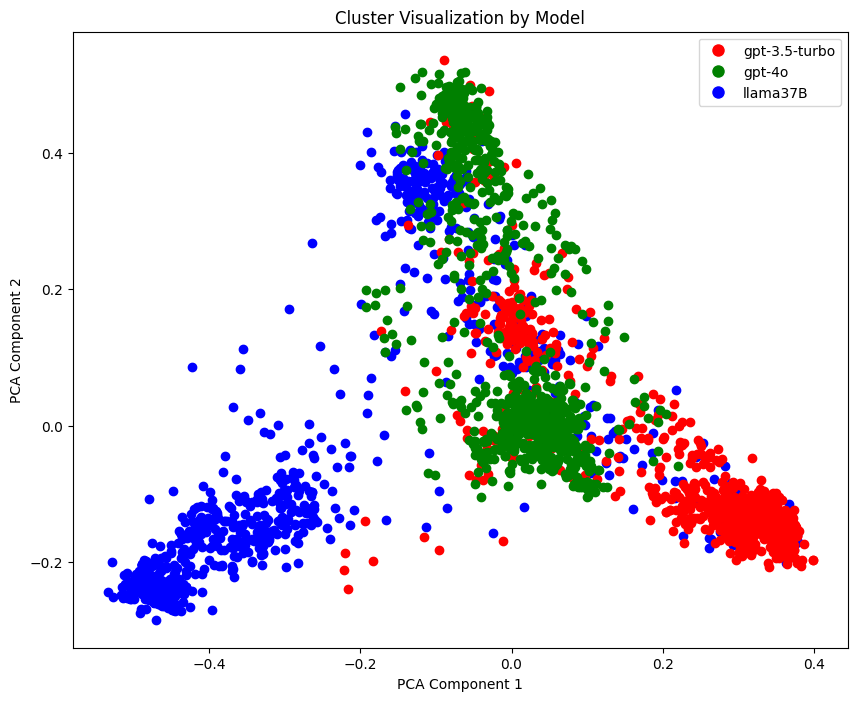

New Central Configurations for each cluster:
Cluster 0: {'temperature': 1.0905675675675675, 'top_p': 0.5180108108108108}
Cluster 1: {'temperature': 1.01784, 'top_p': 0.56394}
Cluster 2: {'temperature': 1.0408, 'top_p': 0.54612}
Cluster 3: {'temperature': 0.9837023255813954, 'top_p': 0.5440511627906977}
Cluster 4: {'temperature': 0.9501746031746032, 'top_p': 0.5277142857142858}
Cluster 5: {'temperature': 1.0561388888888887, 'top_p': 0.539938888888889}
Cluster 6: {'temperature': 1.0371973684210527, 'top_p': 0.5783157894736842}
Cluster 7: {'temperature': 1.08408, 'top_p': 0.587695}
Cluster 8: {'temperature': 1.077655172413793, 'top_p': 0.5760344827586207}
Cluster 9: {'temperature': 1.0908877551020408, 'top_p': 0.5583265306122449}
Cluster 10: {'temperature': 1.0343846153846155, 'top_p': 0.5355307692307693}
Cluster 11: {'temperature': 1.0481374045801528, 'top_p': 0.5282671755725191}
Cluster 12: {'temperature': 1.0196666666666667, 'top_p': 0.5875}
Cluster 13: {'temperature': 1.08113081395348

In [15]:
import json
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

def load_results(filename):
    with open(filename, 'r') as f:
        results = json.load(f)
    # Convert lists back to numpy arrays
    results['embeddings'] = np.array(results['embeddings'])
    results['labels'] = np.array(results['labels'])
    return results

def save_results(results, filename):
    # Convert numpy arrays to lists for JSON serialization
    results['embeddings'] = results['embeddings'].tolist()
    results['labels'] = results['labels'].tolist()
    
    with open(filename, 'w') as f:
        json.dump(results, f, indent=4)

def remove_clusters(data, labels, configs, clusters_to_remove):
    filtered_data = [item for i, item in enumerate(data) if labels[i] not in clusters_to_remove]
    filtered_embeddings = [embedding for i, embedding in enumerate(results['embeddings']) if labels[i] not in clusters_to_remove]
    filtered_labels = [label for label in labels if label not in clusters_to_remove]
    filtered_configs = [configs[i] for i, label in enumerate(labels) if label not in clusters_to_remove]
    return filtered_data, np.array(filtered_embeddings), filtered_labels, filtered_configs

def recluster_data(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    new_labels = kmeans.fit_predict(embeddings)
    return kmeans, new_labels

def calculate_central_configs(configs, labels, n_clusters):
    config_df = pd.DataFrame(configs)
    config_df = config_df.drop(columns=['batch_size', 'max_tokens', 'max_seq_len'], errors='ignore')
    numeric_columns = config_df.select_dtypes(include=[np.number]).columns
    central_configs = config_df.groupby(labels)[numeric_columns].mean().to_dict(orient='records')
    return central_configs

def visualize_and_analyze(new_labels, embeddings):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 8))
    for cluster in range(max(new_labels)+1):
        points = reduced_embeddings[new_labels == cluster]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}')
    plt.legend()
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Re-clustered Visualization')
    plt.show()

def visualize_clusters_by_model(embeddings, labels, configs):
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    model_colors = {
        'gpt-3.5-turbo': 'r',
        'gpt-4o': 'g',
        'llama37B': 'b'
    }
    
    plt.figure(figsize=(10, 8))
    for i, (embedding, config) in enumerate(zip(reduced_embeddings, configs)):
        model_name = config.get('model', 'llama37B')
        color = model_colors.get(model_name, 'b')
        plt.scatter(embedding[0], embedding[1], color=color, label=model_name if i == 0 else "")

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Cluster Visualization by Model')
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=model) 
               for model, color in model_colors.items()]
    plt.legend(handles=handles)
    plt.show()

def display_cluster_details(data, labels):
    for i in range(max(labels)+1):
        cluster_items = [item['response_content'] for j, item in enumerate(data) if labels[j] == i]
        avg_length = np.mean([len(item) for item in cluster_items])
        random_sample = random.sample(cluster_items, min(5, len(cluster_items)))
        print(f'Cluster {i}:')
        print('Random Sample of Responses:', random_sample)
        print('Total Responses:', len(cluster_items))
        print('Average Length of Responses:', avg_length)
        print()

# Load previous results
results = load_results('cluster_results.json')

# Specify clusters to remove
clusters_to_remove = []  # Example clusters to remove

# Remove specified clusters
filtered_data, filtered_embeddings, filtered_labels, filtered_configs = remove_clusters(results['data'], results['labels'], results['configs'], clusters_to_remove)

# Re-cluster and visualize
new_kmeans, new_labels = recluster_data(filtered_embeddings, n_clusters=20)  # Adjust number of clusters if needed
visualize_and_analyze(new_labels, filtered_embeddings)
display_cluster_details(filtered_data, new_labels)
visualize_clusters_by_model(filtered_embeddings, new_labels, filtered_configs)

# Calculate new central configurations
new_central_configs = calculate_central_configs(filtered_configs, new_labels, n_clusters)

# Print new central configurations
print('New Central Configurations for each cluster:')
for idx, config in enumerate(new_central_configs):
    print(f'Cluster {idx}: {config}')

# Save new clustering results
results['data'] = filtered_data
results['embeddings'] = filtered_embeddings
results['labels'] = new_labels
results['configs'] = filtered_configs
results['central_configs'] = new_central_configs

save_results(results, 'cluster_results.json')
